In [56]:
#Necessary Libraies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for the testing dataset
test_datagen = ImageDataGenerator(rescale=1/255)

#Loading the datasets
train_dataset = train.flow_from_directory("C:/Users/sidka/Downloads/abdul/test_dataset/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/sidka/Downloads/abdul/test_dataset/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [58]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [59]:
#Building the models.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))

In [60]:
# Compiling the model with the adam optimizer.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Training the model 
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)
 

Epoch 1/10
7/7 [==============================] - 30s 4s/step - loss: 0.6732 - accuracy: 0.7000 - val_loss: 0.6201 - val_accuracy: 0.8529
Epoch 2/10
7/7 [==============================] - 20s 3s/step - loss: 0.5891 - accuracy: 0.8050 - val_loss: 0.5186 - val_accuracy: 0.8529
Epoch 3/10
7/7 [==============================] - 20s 3s/step - loss: 0.4730 - accuracy: 0.8250 - val_loss: 0.4075 - val_accuracy: 0.8676
Epoch 4/10
7/7 [==============================] - 19s 3s/step - loss: 0.3994 - accuracy: 0.8150 - val_loss: 0.3494 - val_accuracy: 0.8382
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 0.3744 - accuracy: 0.8250 - val_loss: 0.4073 - val_accuracy: 0.8529
Epoch 6/10
7/7 [==============================] - 24s 3s/step - loss: 0.3389 - accuracy: 0.8550 - val_loss: 0.3239 - val_accuracy: 0.8529
Epoch 7/10
7/7 [==============================] - 23s 3s/step - loss: 0.3419 - accuracy: 0.8500 - val_loss: 0.3263 - val_accuracy: 0.8824
Epoch 8/10
7/7 [==================

In [62]:
#the predictions happen here. 
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 2s 470ms/step


In [63]:
predictions

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [41]:

print(len(predictions))

68


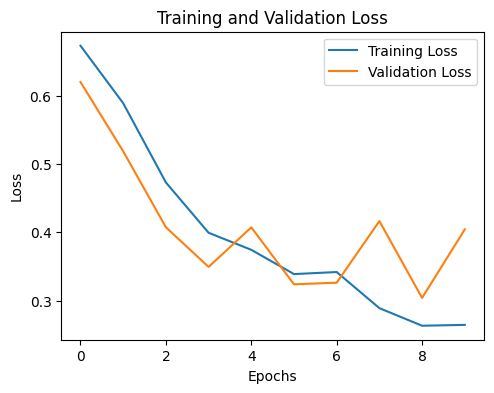

In [64]:
# plotting training and validation metrics.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

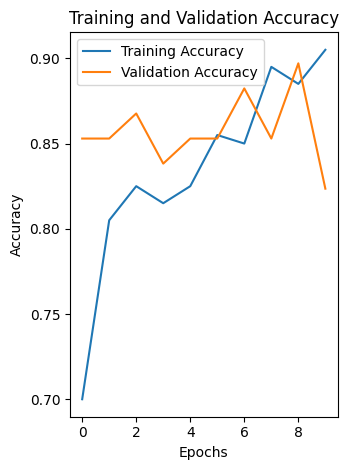

In [65]:
# plotting training and validation metrics.
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
# Function for predicting and displaying results
def predictImage(filename):
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    result = model.predict(img_array)
    
    if result[0][0] > 0.5:
        plt.xlabel("No Fire (Confidence: {:.2f}%)".format(result[0][0] * 100), fontsize=12)
    else:
        plt.xlabel("Fire (Confidence: {:.2f}%)".format((1 - result[0][0]) * 100), fontsize=12)

1/1 [==============================] - 0s 374ms/step


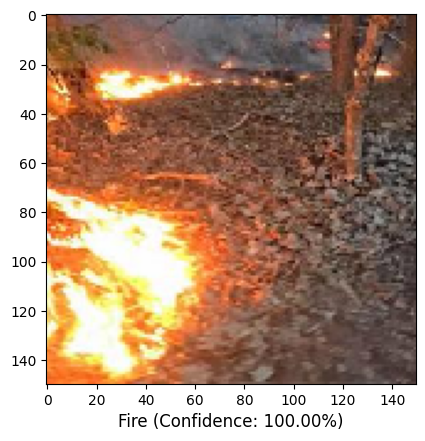

In [67]:
#Example Usage
predictImage("C:/Users/sidka/Downloads/abdul/test_dataset/Testing/fire/abc169.jpg")

1/1 [==============================] - 0s 122ms/step


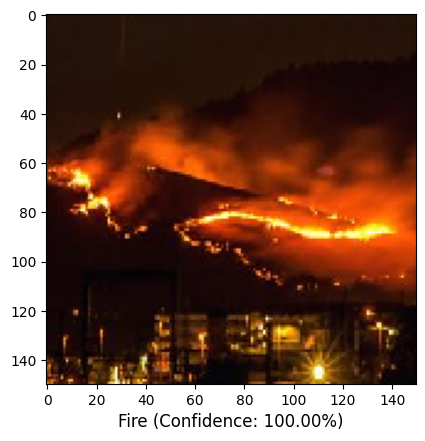

In [68]:
predictImage("C:/Users/sidka/Downloads/abdul/test_dataset/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 122ms/step


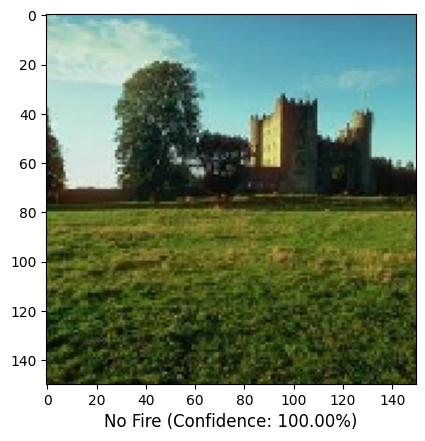

In [69]:
predictImage("C:/Users/sidka/Downloads/abdul/test_dataset/Testing/nofire/abc353.jpg")

1/1 [==============================] - 0s 122ms/step


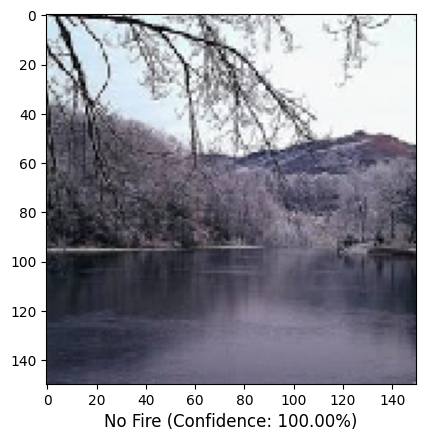

In [70]:

predictImage("C:/Users/sidka/Downloads/abdul/test_dataset/Testing/nofire/abc345.jpg")